# Rozdział 11. Równania różniczkowe cząstkowe

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import mpl_toolkits.mplot3d

import scipy.sparse as sp

import scipy.sparse.linalg

import scipy.linalg as la

## Metoda różnic skończonych

### Przykład jednowymiarowy

Równanie przewodnictwa cieplnego: 
$$-5 = u_{xx}$$
Warunki brzegowe:
$$u(x=0) = 1, u(x=1) = 2$$
Przybliżenie drugiej pochodnej:
$$
u_{xx}[n] \approx \frac{u[n-1] - 2u[n] + u[n+1]}{\Delta x^2}
$$

In [13]:
N = 7

u0 = 1
u1 = 2

dx = 1.0 / (N + 1)

A = (np.eye(N, k=-1) - 2 * np.eye(N) + np.eye(N, k=1)) / dx**2
A

array([[-128.,   64.,    0.,    0.,    0.,    0.,    0.],
       [  64., -128.,   64.,    0.,    0.,    0.,    0.],
       [   0.,   64., -128.,   64.,    0.,    0.,    0.],
       [   0.,    0.,   64., -128.,   64.,    0.,    0.],
       [   0.,    0.,    0.,   64., -128.,   64.,    0.],
       [   0.,    0.,    0.,    0.,   64., -128.,   64.],
       [   0.,    0.,    0.,    0.,    0.,   64., -128.]])

In [14]:
d = -5 * np.ones(N)
d[0] -= u0 / dx**2
d[N-1] -= u1 / dx**2

u = np.linalg.solve(A, d)

x = np.linspace(0, 1, N+2)
U = np.hstack([[u0], u, [u1]])

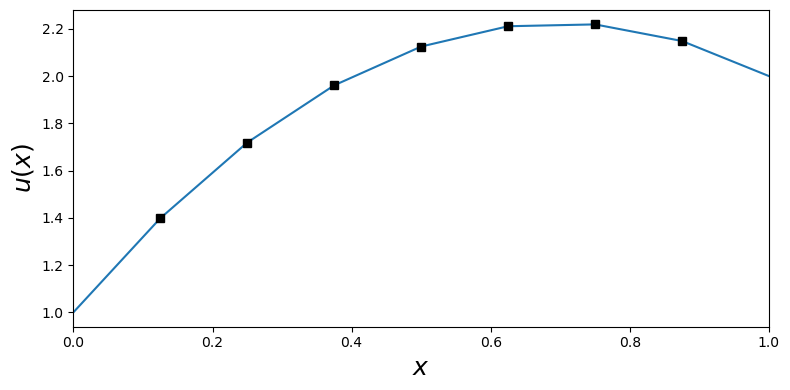

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, U)
ax.plot(x[1:-1], u, 'ks')
ax.set_xlim(0, 1)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$u(x)$", fontsize=18)
fig.tight_layout();

### Przykład dwuwymiarowy

Równanie Laplace'a: 
$$u_{xx} + u_{yy} = 0$$

Warunki brzegowe:
$$
u(x=0) = u(x=1) = u(y = 0) = u(y = 1) = 10
$$

Przybliżenia pochodnych:
$$
u_{xx}[m, n] \approx \frac{u[m-1, n] - 2u[m,n] + u[m+1,n]}{dx^2}
$$
$$
u_{yy}[m, n] \approx \frac{u[m, n-1] - 2u[m,n] + u[m,n+1]}{dy^2}
$$

Ostateczna postać:

$
0 =
\frac{u[m + N, n -1] - 2u[m + N, n] + u[m + N, n + 1]}{dx^2}
+
\frac{u[m + N, n -N)] - 2u[m + N, n] + u[m + N, n + N])}{dy^2}
$

In [2]:
N = 100

u0_t, u0_b = 5, -5
u0_l, u0_r = 3, -1

dx = 1. / (N+1)

A_1d = (sp.eye(N, k=-1) + sp.eye(N, k=1) - 4 * sp.eye(N))/dx**2

A = sp.kron(sp.eye(N), A_1d) + (sp.eye(N**2, k=-N) + sp.eye(N**2, k=N))/dx**2
A

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 49600 stored elements in Compressed Sparse Row format>

In [3]:
d = np.zeros((N, N))

d[0, :] += -u0_b  # Dolne ograniczenie
d[-1, :] += -u0_t # Górne ograniczenie
d[:, 0] += -u0_l  # Lewe ograniczenie
d[:, -1] += -u0_r # Prawe ograniczenie

d = d.reshape(N**2) / dx**2

In [4]:
u = sp.linalg.spsolve(A, d).reshape(N, N)

In [5]:
U = np.vstack([np.ones((1, N+2)) * u0_b,
               np.hstack([np.ones((N, 1)) * u0_l, u, np.ones((N, 1)) * u0_r]),
               np.ones((1, N+2)) * u0_t])

/tmp/ipykernel_27583/858141333.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c = ax.pcolor(X, Y, U, vmin=-5, vmax=5, cmap=mpl.cm.get_cmap('RdBu_r'))


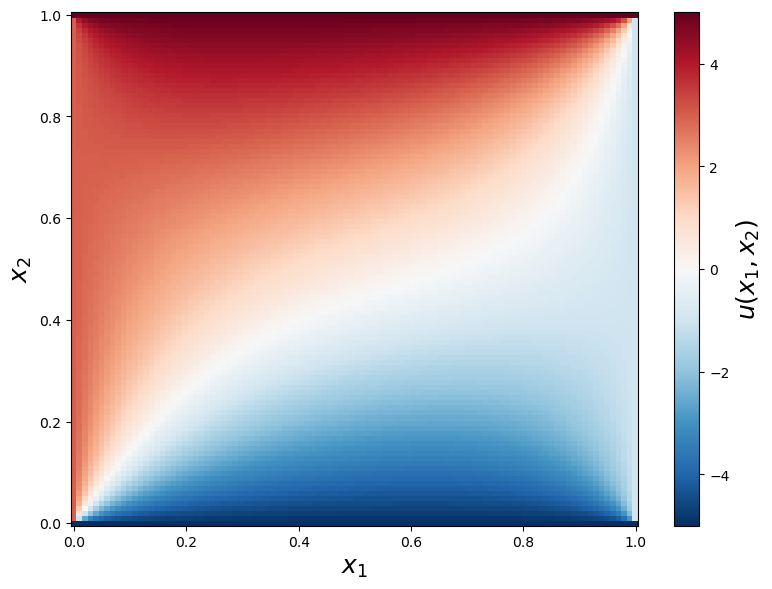

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

x = np.linspace(0, 1, N+2)
X, Y = np.meshgrid(x, x)

c = ax.pcolor(X, Y, U, vmin=-5, vmax=5, cmap=mpl.cm.get_cmap('RdBu_r'))
cb = plt.colorbar(c, ax=ax)

ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
cb.set_label(r"$u(x_1, x_2)$", fontsize=18)
fig.tight_layout();

### Porównanie wydajności: reprezentacja gęsta/rzadka

In [7]:
A_dense = A.todense()

In [8]:
%timeit np.linalg.solve(A_dense, d)

6.64 s ± 119 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%timeit la.solve(A_dense, d)

7.63 s ± 97.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%timeit sp.linalg.spsolve(A, d)

89.8 ms ± 8.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
